In [27]:
#imports
import sys 
import numpy as np 
import matplotlib.pyplot as plt 
import uproot3 as ur3
import uproot as ur4
import pandas as pd 
from tqdm import tqdm 
from pathlib import Path
import awkward as ak

In [42]:
def read_root_file(path, treenames, branchnames):
    """
    Read a root file using uproot4 and extract data from specified trees and branches.

    Args:
        path (str): The path to the root file.
        treenames (list): A list of tree names to read.
        branchnames (list): A list of branch names to extract data from.

    Returns:
        dict: A dictionary containing the structured data.

    """
    try:
        file = ur4.open(path)
        data = {}
        for treename in treenames:
            tree = file[treename]
            data[treename] = {}
            for branchname in branchnames:
                branch = tree[branchname]
                data[treename][branchname] = branch.array()[0]
        return data
    except FileNotFoundError:
        print(f"File '{path}' not found.")
    except KeyError:
        print(f"Tree or branch not found in file '{path}'.")
    except Exception as e:
        print(f"An error occurred while reading the root file: {str(e)}")

def PrintRootTrees(roottree):
    if roottree is not None:
        # Access the structured data
        for treename, branches in roottree.items():
            print(f"Tree: {treename}")
            for branchname, data in branches.items():
                print(f"\tBranch: {branchname}")
                print("\t     ",data)

def PlotRootTrees(roottree,amount,xlim,ylim):
    if roottree is not None:
        # Access the structured data
        enum=0
        for treename, branches in roottree.items():
            if(enum>=amount):
                return
            print(f"Tree: {treename}")
            f=plt.figure(enum,figsize=[10,10])
            for branchname, data in branches.items():
                if branchname=="EventID":
                    continue
                if branchname == "Trigger_data_g0" or branchname == "Trigger_data_g1":
                    data = 0.01*data
                #print(f"\tBranch: {branchname}")
                plt.plot(data*1000/4096,label=branchname)
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.legend()
            plt.show()
            enum = enum+1

In [36]:
path = "../Data/FirstData/RawData.root"
treenames = []
branchnames = ["EventID"]
for i_event in range(1,101):
    treenames.append("Event;{}".format(i_event))

for i_channel in range(0,16):
    branchnames.append("Data_ch{}".format(i_channel))
branchnames.append("Trigger_data_g0")
branchnames.append("Trigger_data_g1")

result = read_root_file(path, treenames, branchnames)

Tree: Event;1


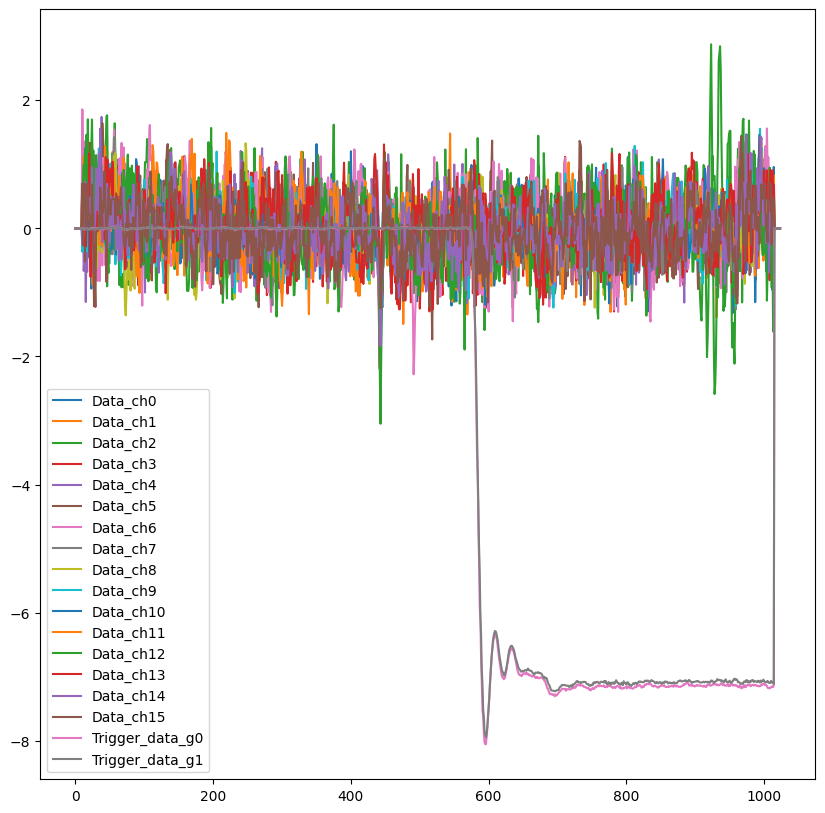

Tree: Event;2


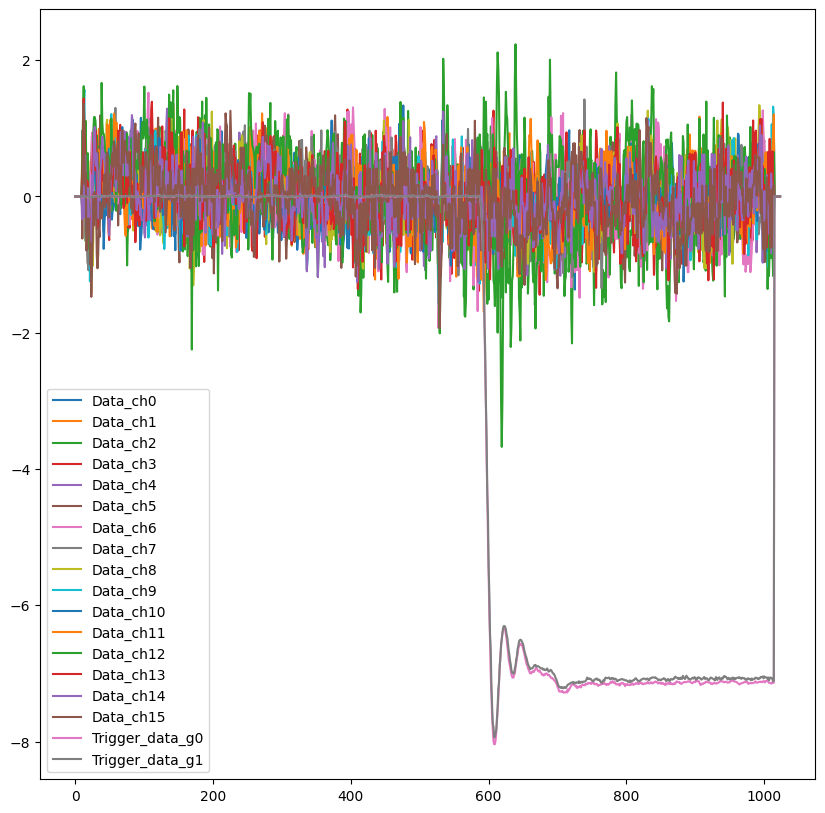

Tree: Event;3


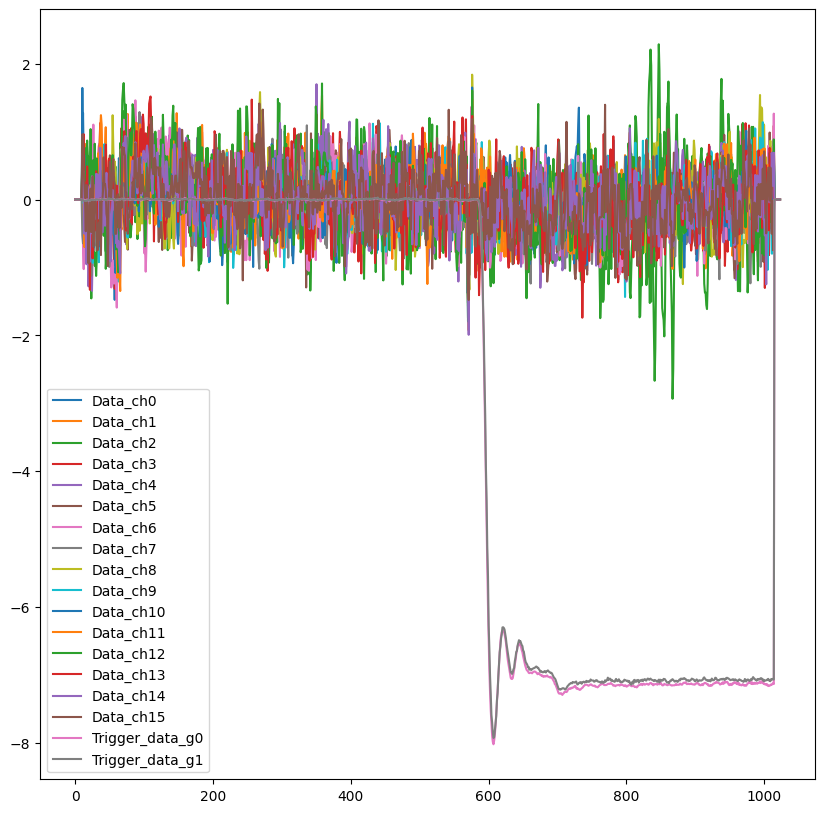

Tree: Event;4


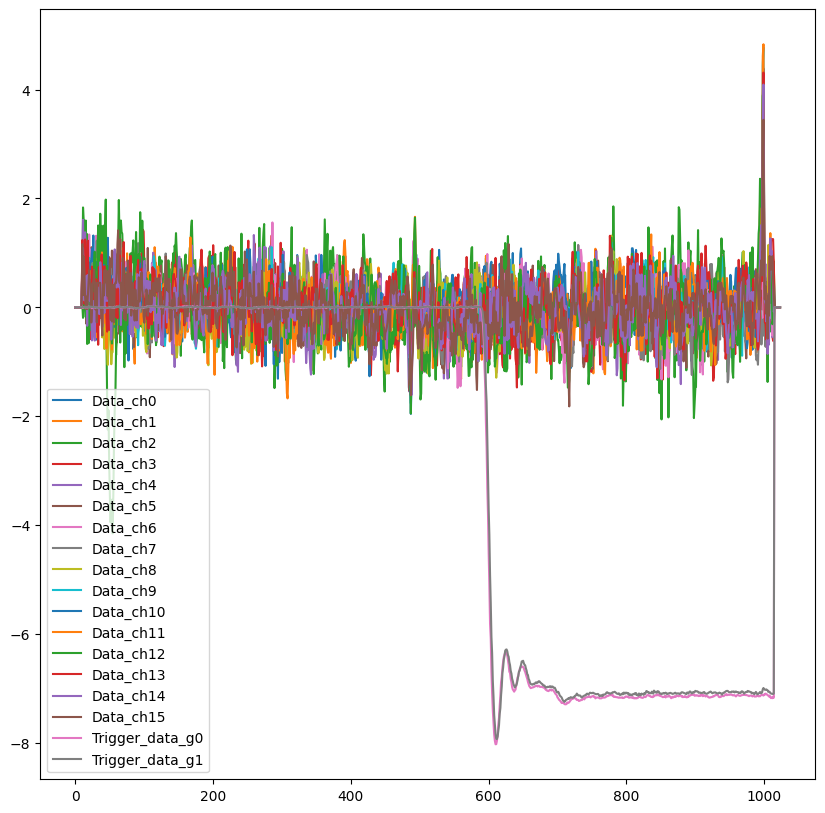

Tree: Event;5


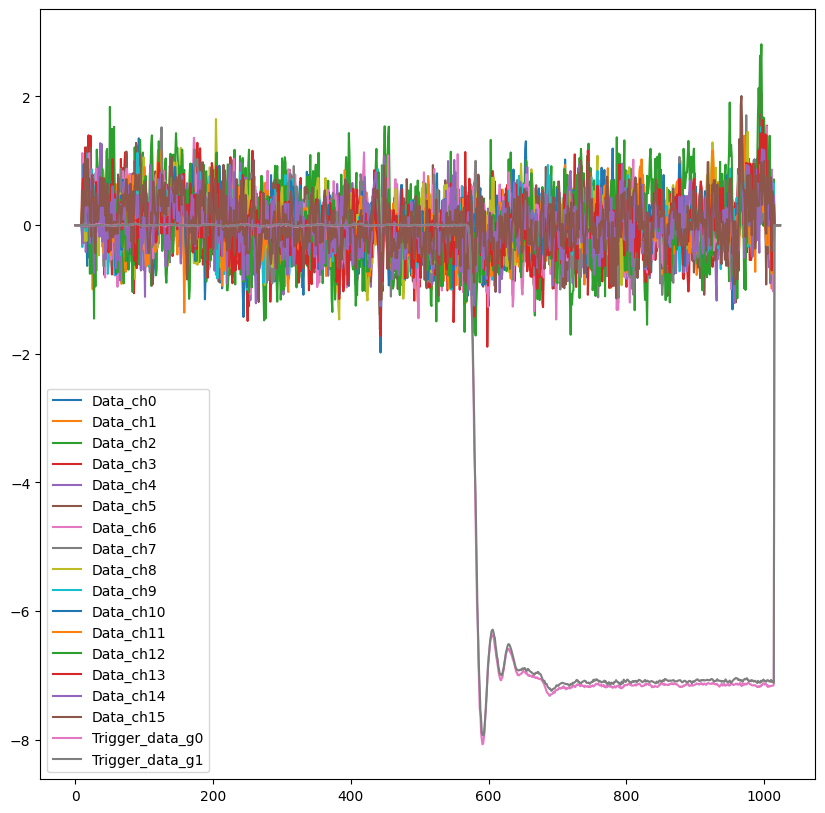

Tree: Event;6


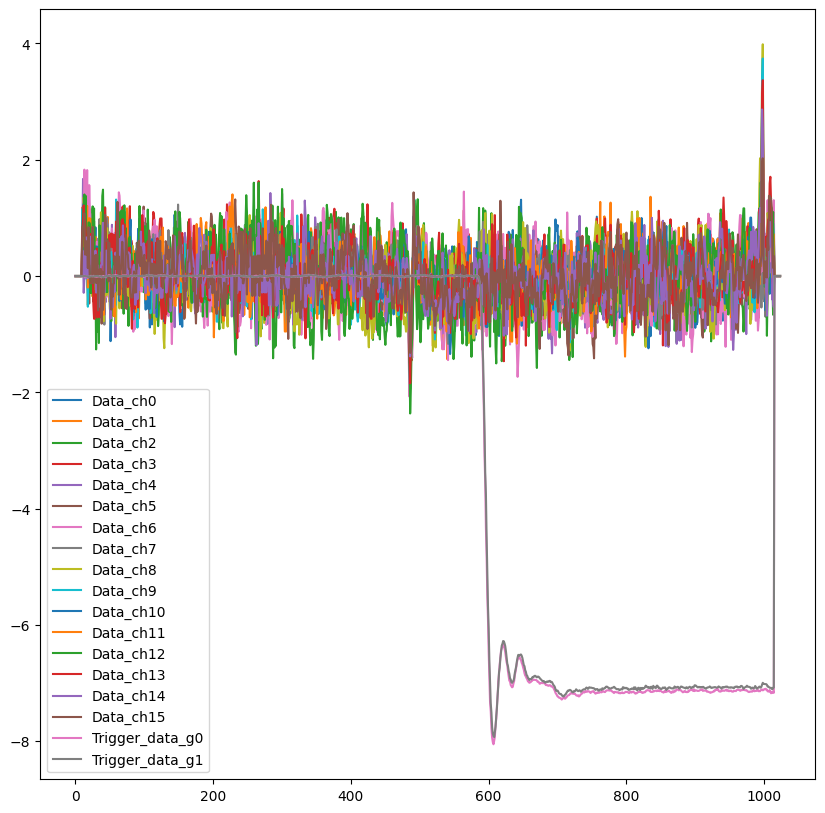

Tree: Event;7


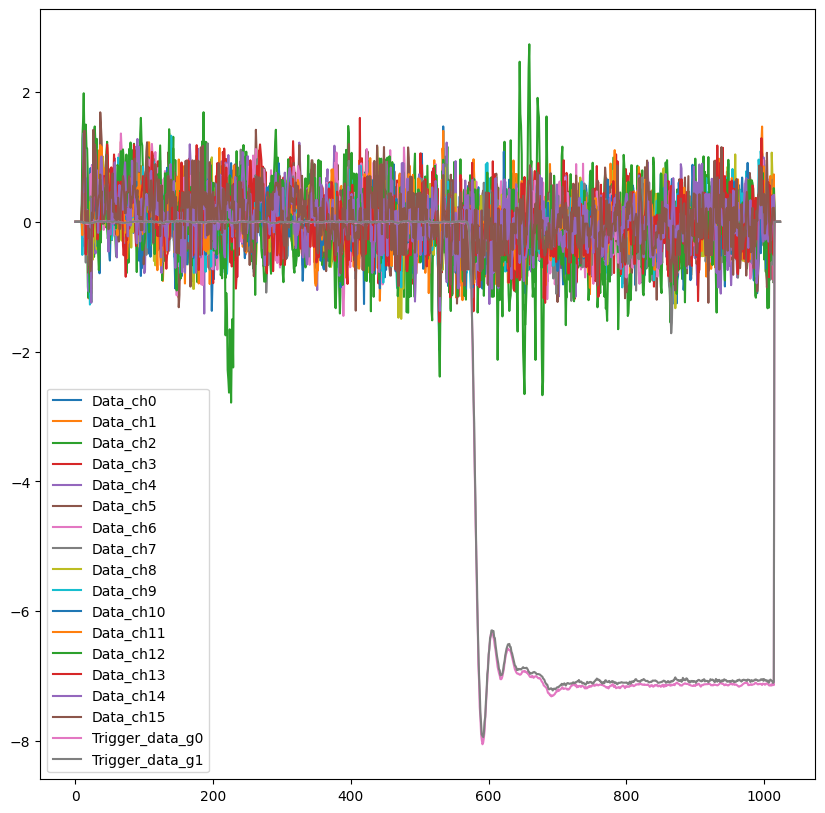

Tree: Event;8


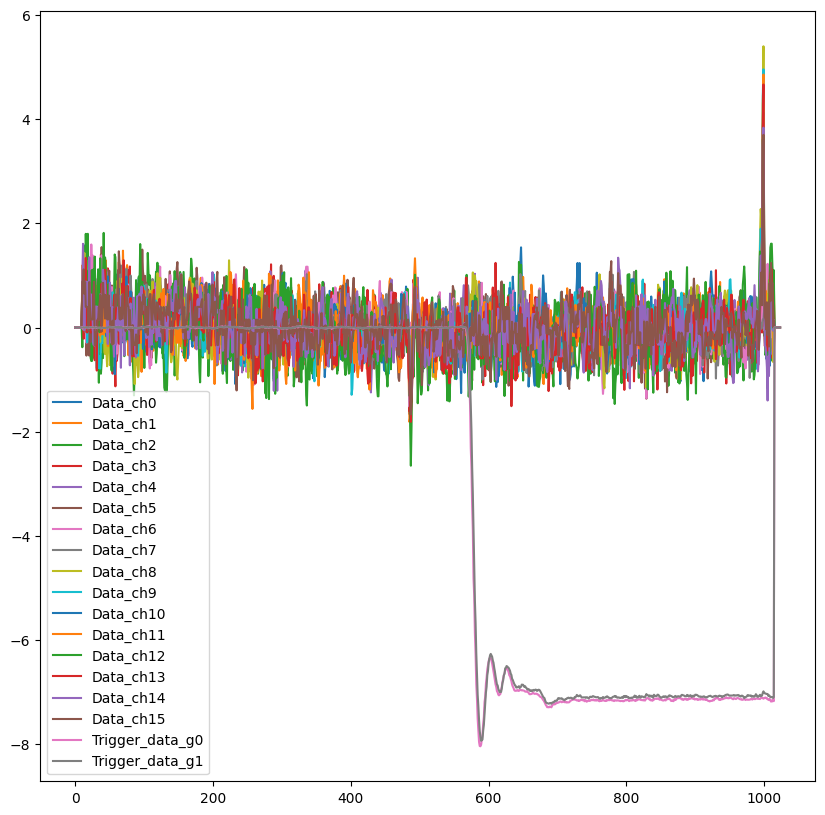

Tree: Event;9


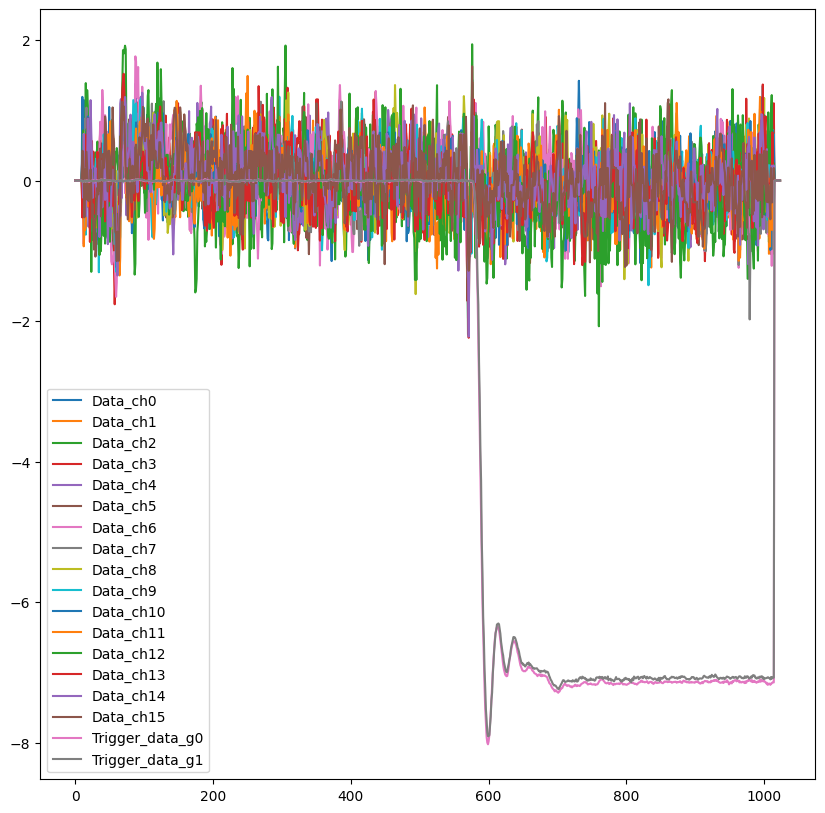

Tree: Event;10


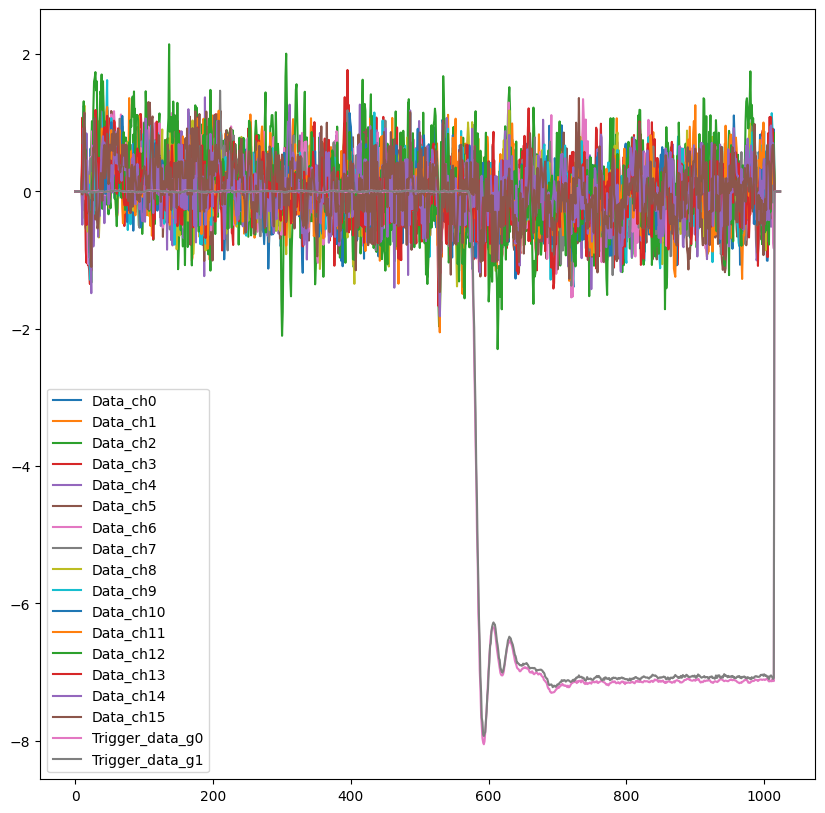

Tree: Event;11


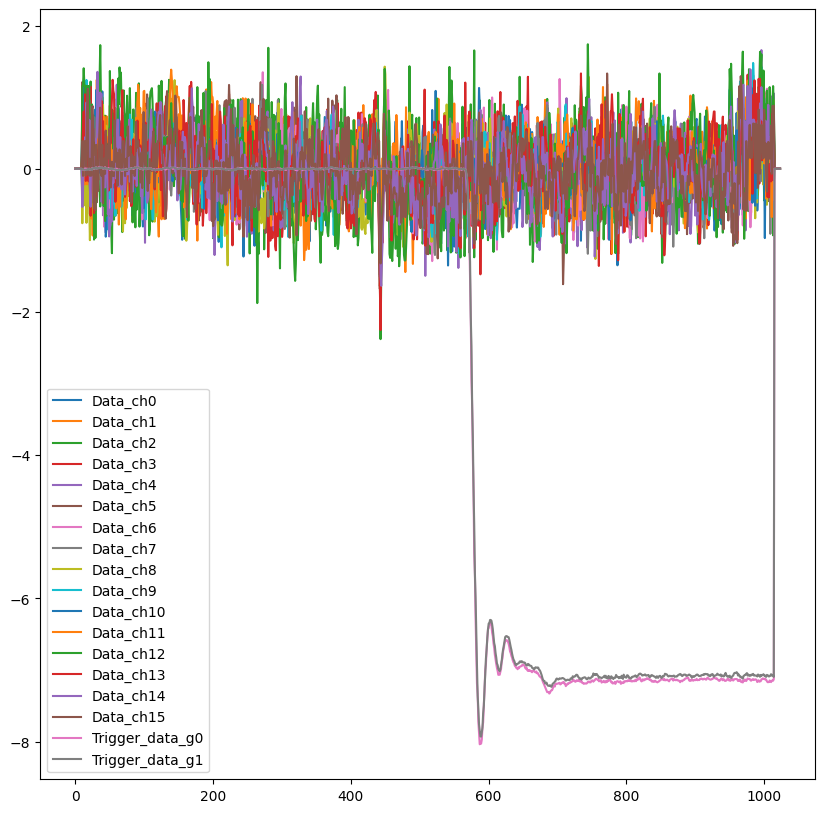

Tree: Event;12


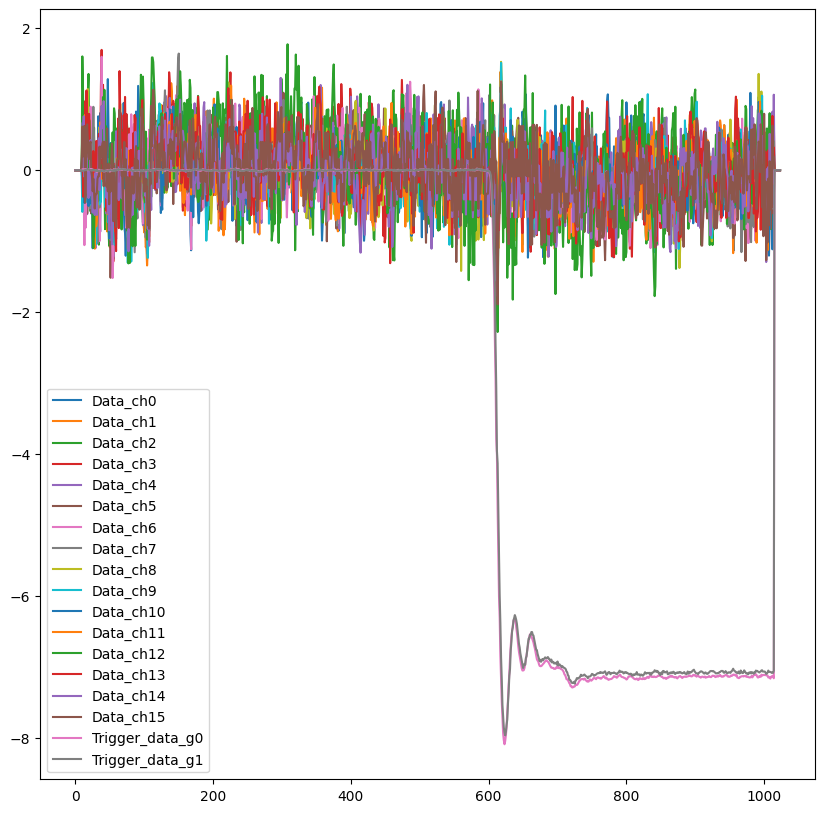

Tree: Event;13


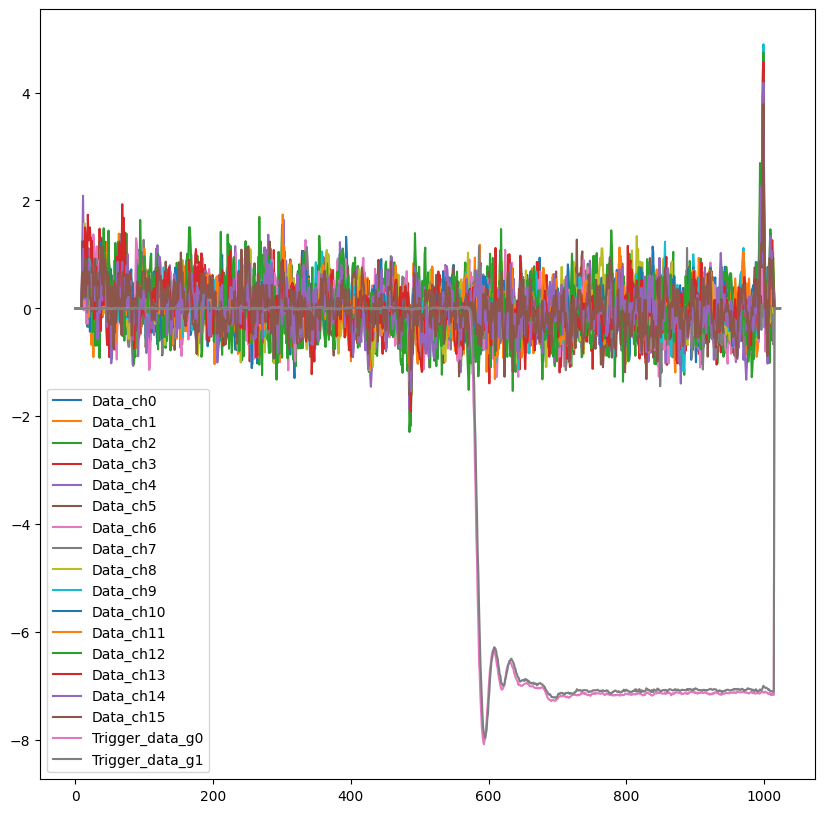

Tree: Event;14


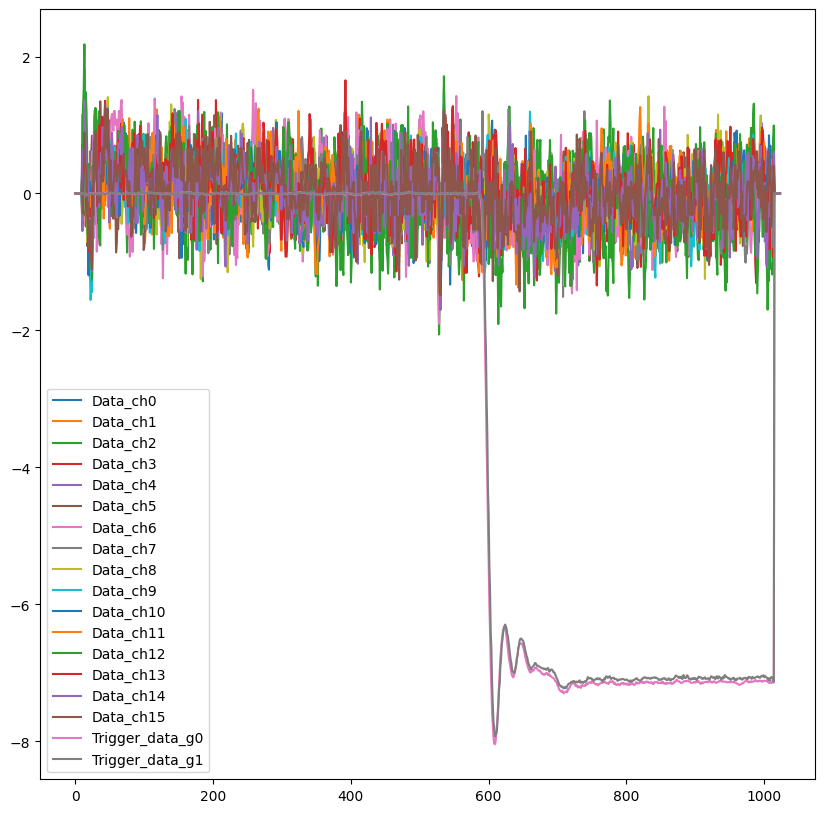

Tree: Event;15


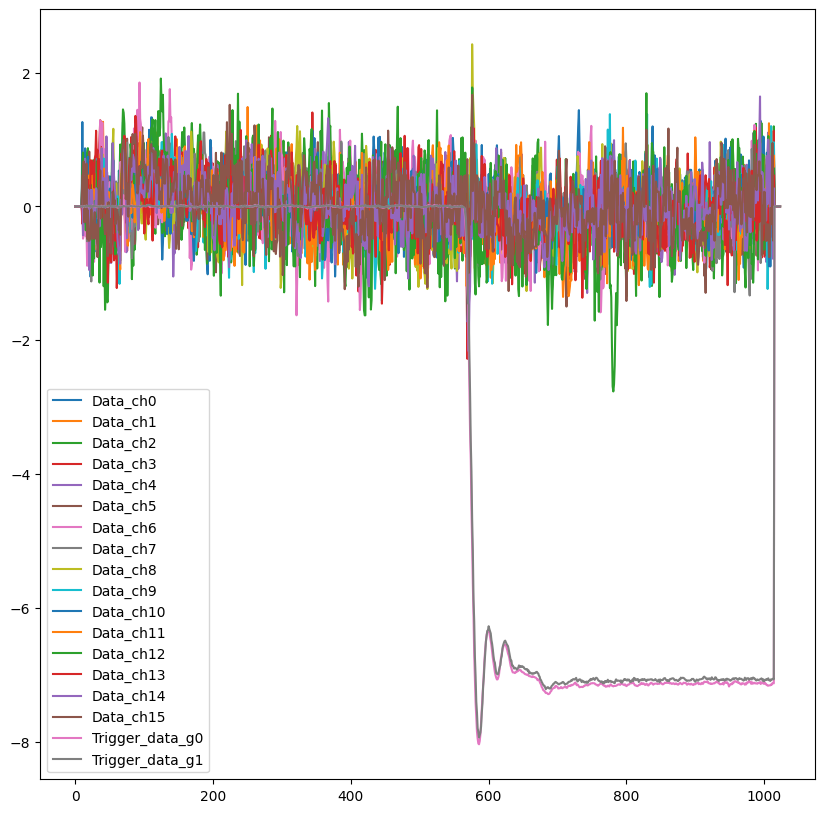

Tree: Event;16


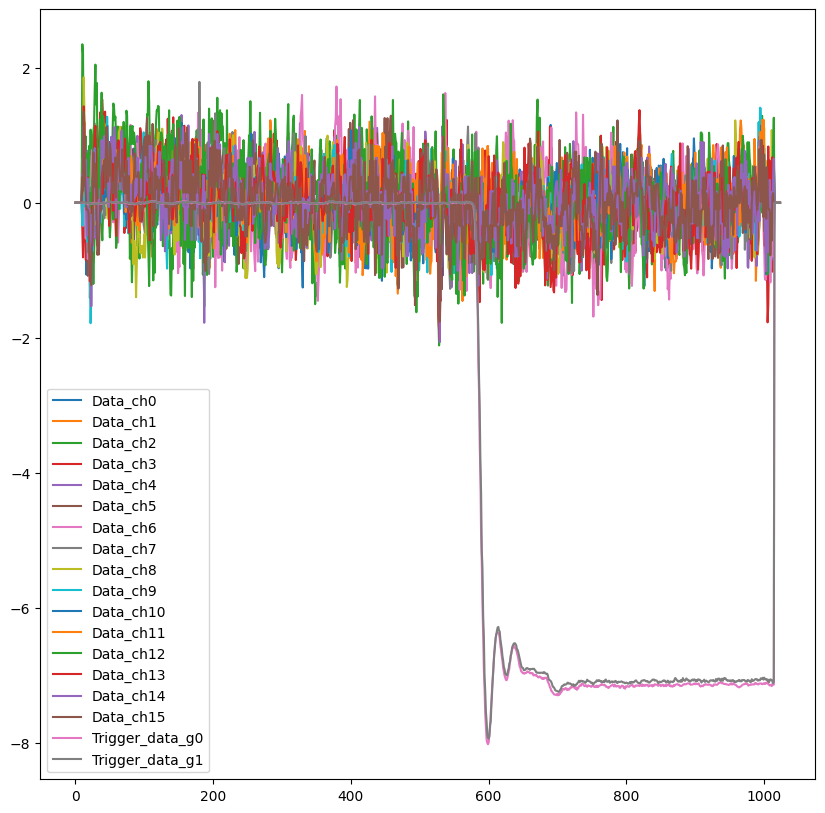

Tree: Event;17


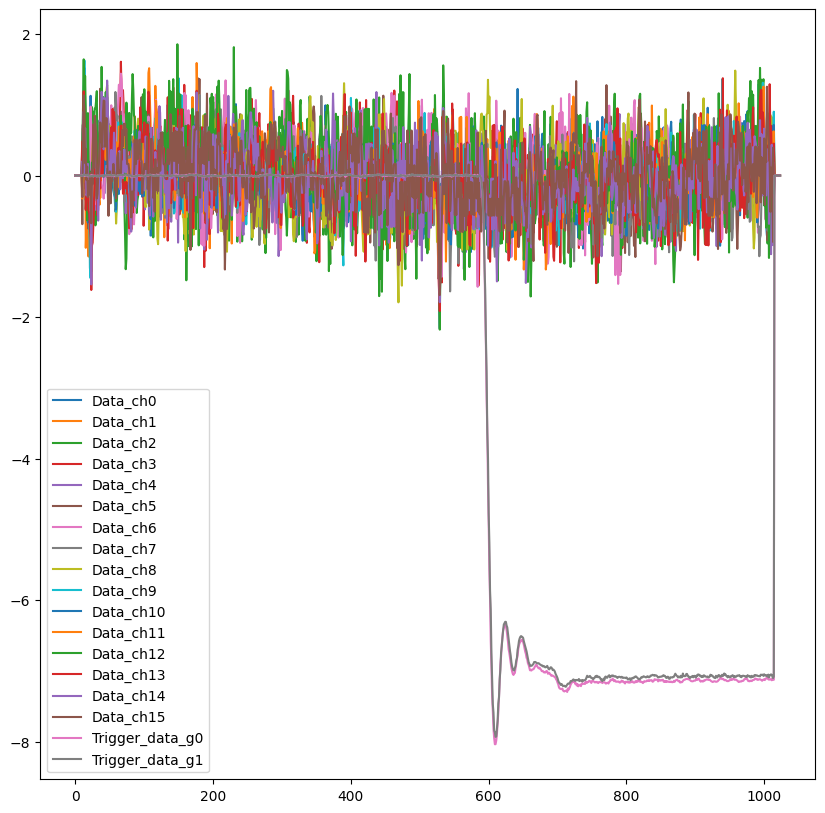

Tree: Event;18


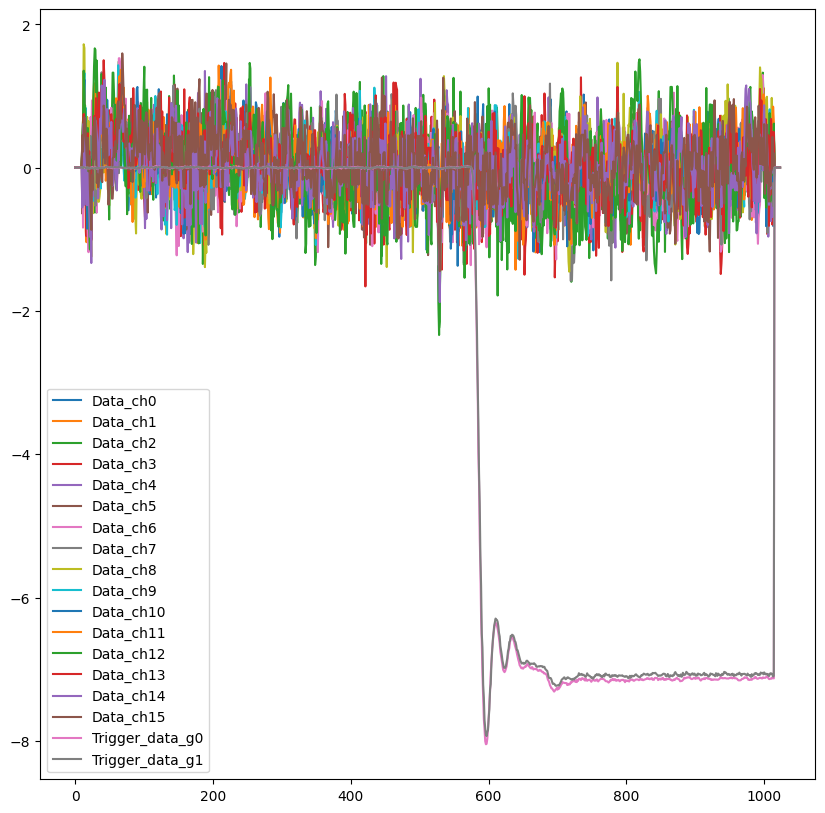

Tree: Event;19


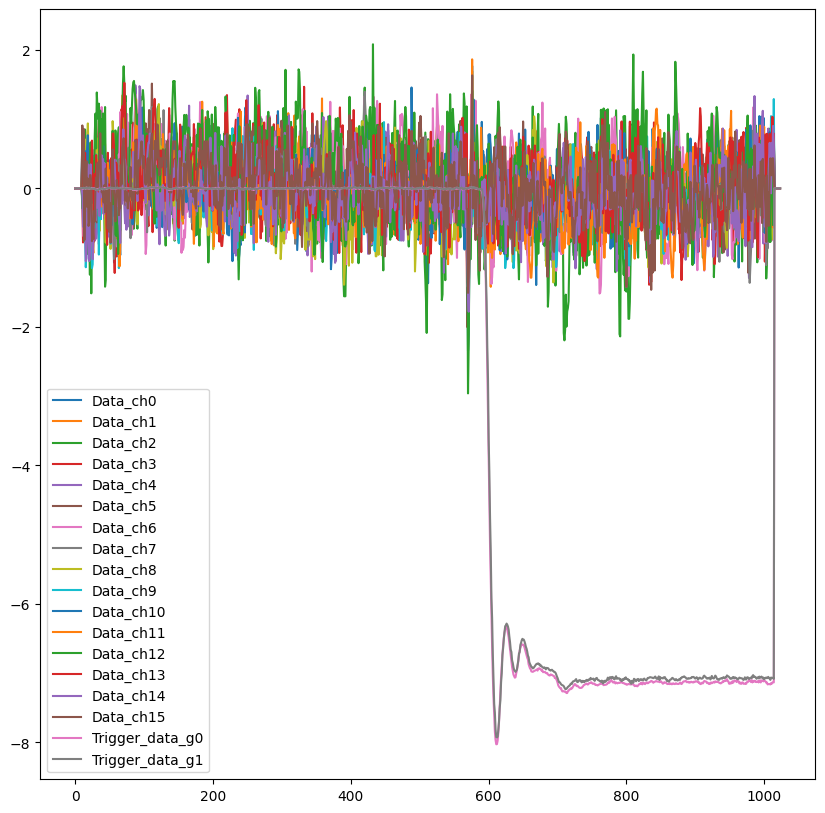

Tree: Event;20


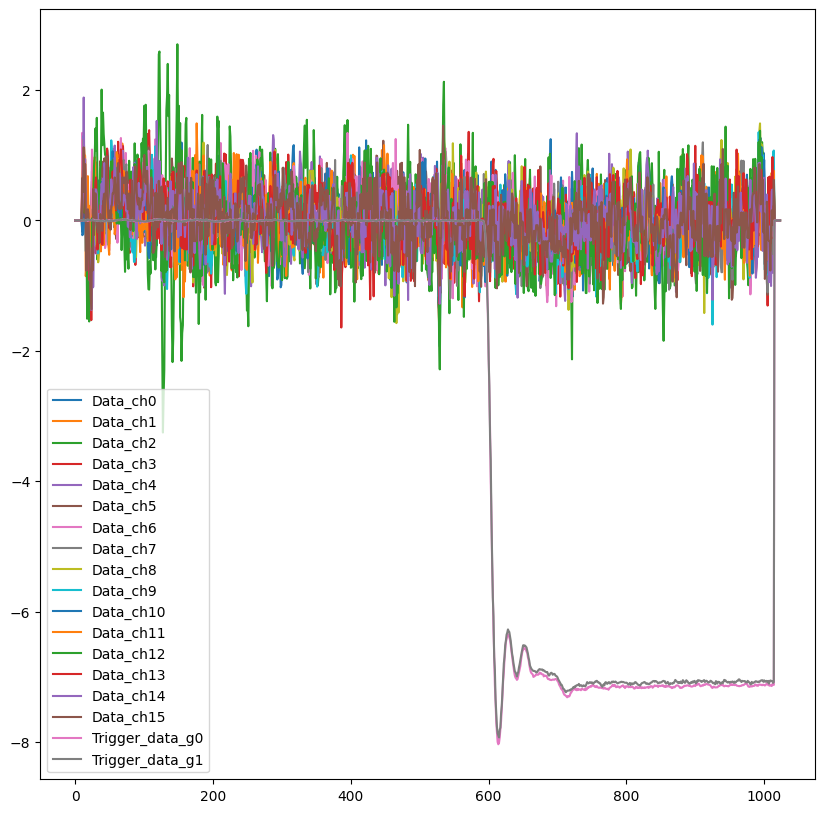

In [43]:
#PrintRootTrees(result)
PlotRootTrees(result,20,[None,None],[None,None])
